# Regression 

In [97]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from scipy.interpolate import make_smoothing_spline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## 1. 

In [ ]:
def g(x): 
    return 4.26 * (np.exp(-x) - 4 * np.exp(-2 * x) + 3 * np.exp(-3 * x))

def generate_regression_data(n): 
    x = np.random.uniform(0, 4, n)
    eps = np.random.normal(0, 0.1, n)
    return x, g(x) + eps

n = 100
X, y = generate_regression_data(n)

## 2. 

In [99]:
class NW_kernel_regression(): 
    def __init__(self, X, y, K, h):
        self.X = X
        self.y = y 
        self.K = K 
        self.h = h
        
    def predict(self, x_0):
        w = self.K((self.X - x_0)/ self.h)
        return np.sum(w * self.y)/np.sum(w)
    
    def predict_array(self, x_0): 
        results = []
        for x in x_0: 
            results.append(self.predict(x))
        return np.array(results)


In [100]:
def kernel_function(x):
    return norm.pdf(x, 0, 1)

NW_kernel_regression(X, y, kernel_function, 1).predict_array(np.array([2,3]))

array([0.07825163, 0.16271125])

## 3. & 5.

In [101]:
X, y = generate_regression_data(1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

nw_kernel = NW_kernel_regression(X_train, y_train, kernel_function, 0.1)
sorted_indices = np.argsort(X_train)
smoothing_spline = make_smoothing_spline(X_train[sorted_indices], y_train[sorted_indices])

nw_kernel_results = nw_kernel.predict_array(X_test)
smoothing_spline_results = smoothing_spline(X_test)
g_results = g(X_test)

print("MSE NW kernel: ", mean_squared_error(y_test, nw_kernel_results))
print("MSE, Smoothing spline: ", mean_squared_error(y_test, smoothing_spline_results))
print("MSE g: ", mean_squared_error(y_test, g_results))

MSE NW kernel:  0.01232450729458043
MSE, Smoothing spline:  0.010045005023162183
MSE g:  0.010124868679708628


## 4.

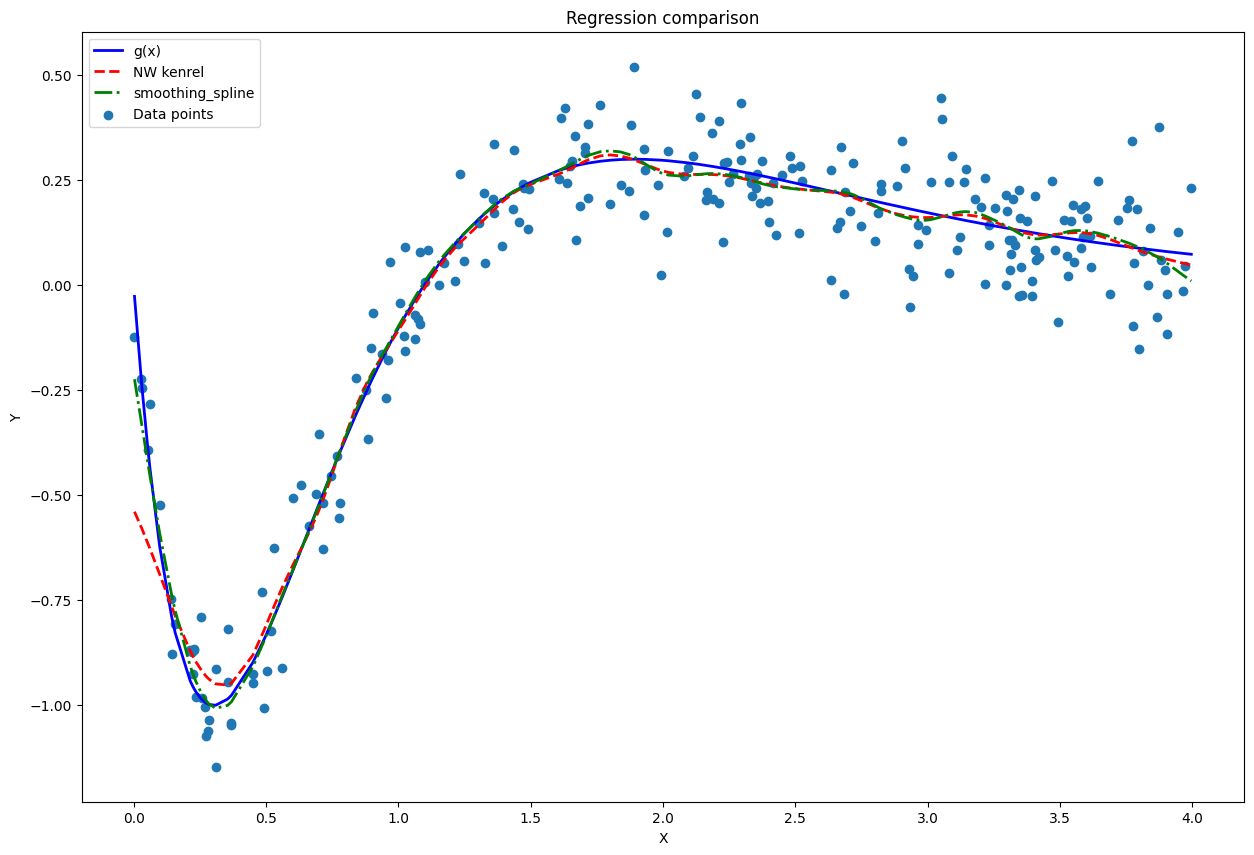

In [102]:
plt.figure(figsize=(15, 10))
sorted_indices_test = np.argsort(X_test)
plt.plot(X_test[sorted_indices_test], g_results[sorted_indices_test], "b-", label="g(x)", lw=2)
plt.plot(X_test[sorted_indices_test], nw_kernel_results[sorted_indices_test], "r--", label="NW kenrel", lw=2)
plt.plot(X_test[sorted_indices_test], smoothing_spline_results[sorted_indices_test], "g-.", label="smoothing_spline", lw=2)
plt.scatter(X_test, y_test, label="Data points")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regression comparison")
plt.legend()
plt.show()

## 6.

N list:  [  50  100  150  200  250  300  350  400  450  500  550  600  650  700
  750  800  850  900  950 1000]


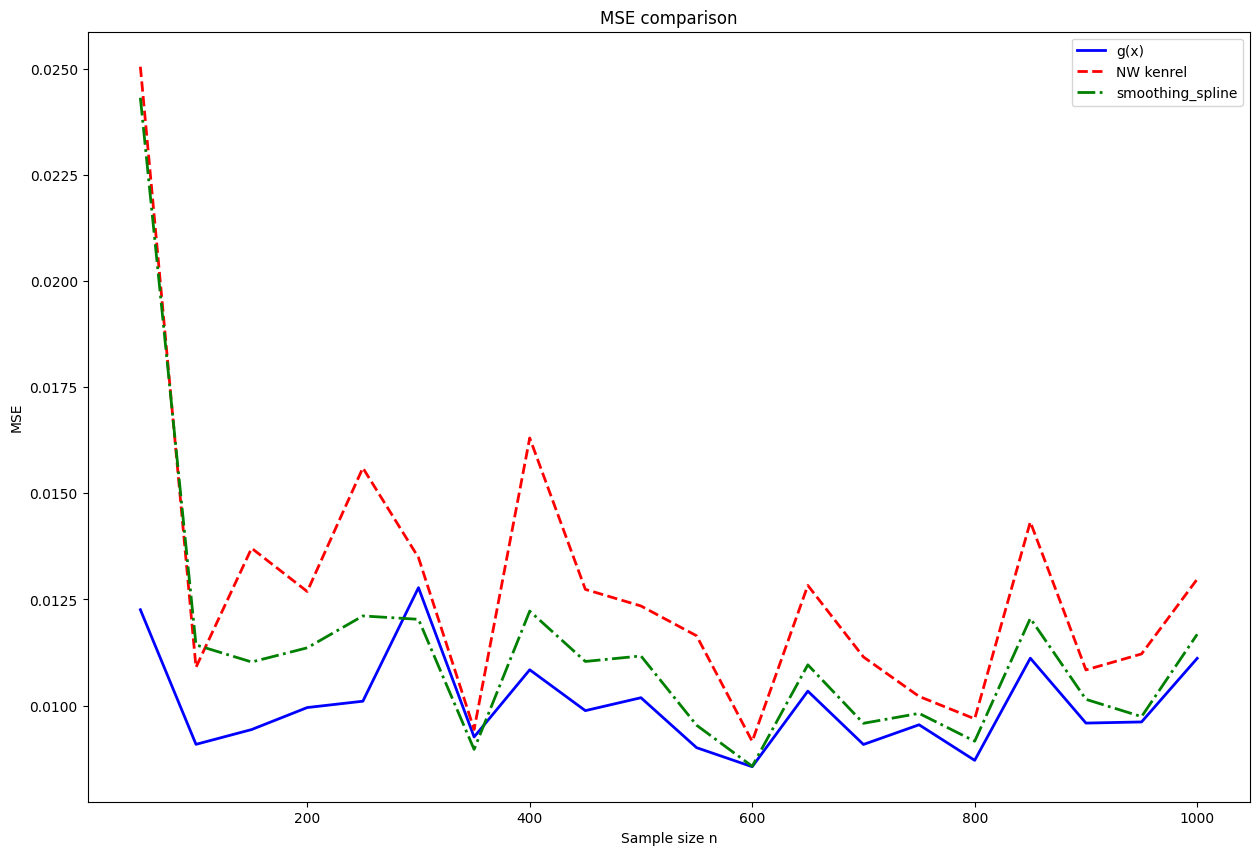

In [103]:
def compare_mse(n):
    X, y = generate_regression_data(n)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    nw_kernel = NW_kernel_regression(X_train, y_train, kernel_function, 0.1)
    sorted_indices = np.argsort(X_train)
    smoothing_spline = make_smoothing_spline(X_train[sorted_indices], y_train[sorted_indices])

    nw_kernel_results = nw_kernel.predict_array(X_test)
    smoothing_spline_results = smoothing_spline(X_test)
    g_results = g(X_test)
    
    return (mean_squared_error(y_test, nw_kernel_results), 
            mean_squared_error(y_test, smoothing_spline_results), 
            mean_squared_error(y_test, g_results))

n_list = np.linspace(start=50, stop=1000, num=20, dtype=int)
print("N list: ", n_list)
mse_nw_kernel_results = []
mse_smoothing_spline_results = []
mse_g_results = []
for n in n_list:
    mse_nw_kernel, mse_smoothing_spline, mse_g = compare_mse(n)
    mse_nw_kernel_results.append(mse_nw_kernel)
    mse_smoothing_spline_results.append(mse_smoothing_spline)
    mse_g_results.append(mse_g)

plt.figure(figsize=(15, 10))
plt.plot(n_list, mse_g_results, "b-", label="g(x)", lw=2)
plt.plot(n_list, mse_nw_kernel_results, "r--", label="NW kenrel", lw=2)
plt.plot(n_list, mse_smoothing_spline_results, "g-.", label="smoothing_spline", lw=2)
plt.xlabel("Sample size n")
plt.ylabel("MSE")
plt.title("MSE comparison")
plt.legend()
plt.show()
    

N list:  [  50  100  150  200  250  300  350  400  450  500  550  600  650  700
  750  800  850  900  950 1000]


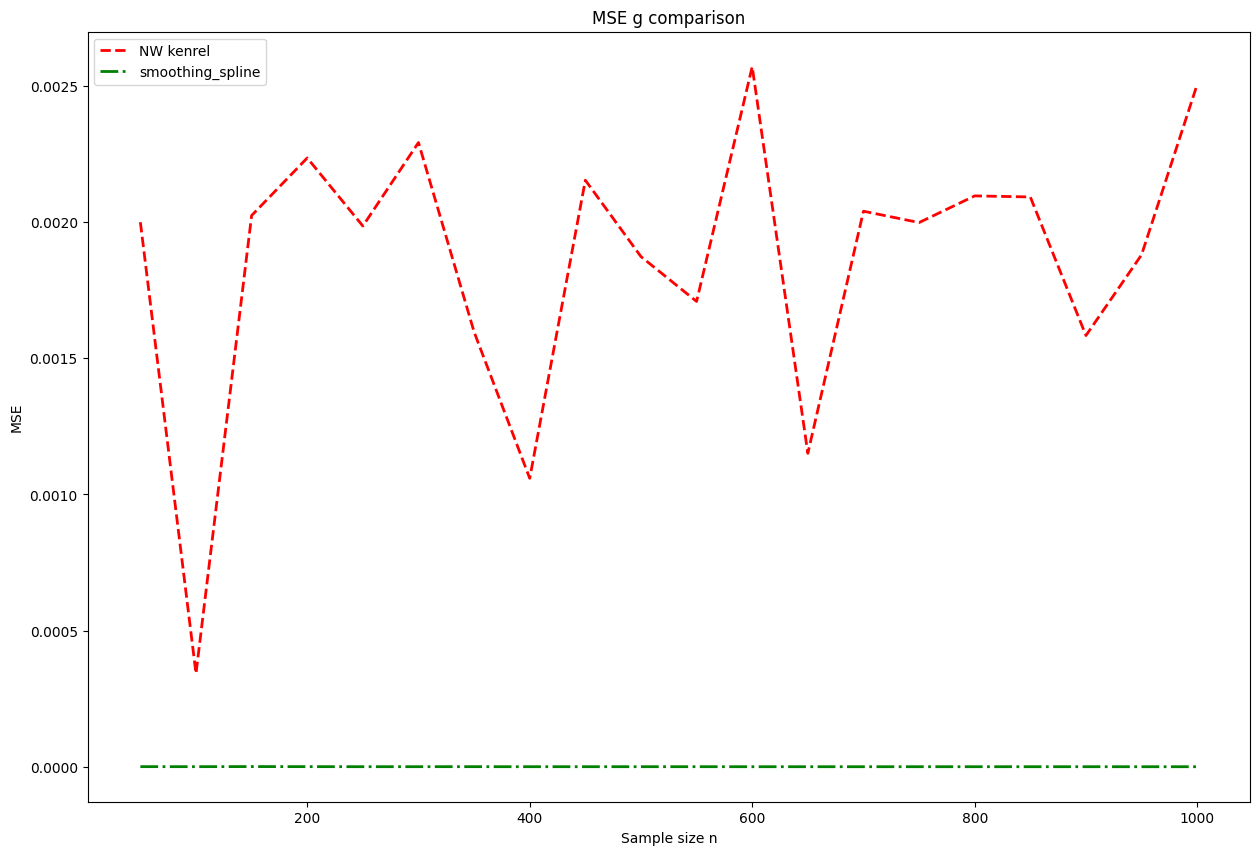

In [111]:
def compare_mse_g(n):
    
    x = np.random.uniform(0, 4, n)
    y = g(x)

    nw_kernel = NW_kernel_regression(x, y, kernel_function, 0.1)
    sorted_indices = np.argsort(x)
    smoothing_spline = make_smoothing_spline(x[sorted_indices], y[sorted_indices])

    nw_kernel_results = nw_kernel.predict_array(x)
    smoothing_spline_results = smoothing_spline(x)
    
    return (mean_squared_error(y, nw_kernel_results), 
            mean_squared_error(y, smoothing_spline_results))

n_list = np.linspace(start=50, stop=1000, num=20, dtype=int)
print("N list: ", n_list)
mse_nw_kernel_results = []
mse_smoothing_spline_results = []
for n in n_list:
    mse_nw_kernel, mse_smoothing_spline = compare_mse_g(n)
    mse_nw_kernel_results.append(mse_nw_kernel)
    mse_smoothing_spline_results.append(mse_smoothing_spline)

plt.figure(figsize=(15, 10))
plt.plot(n_list, mse_nw_kernel_results, "r--", label="NW kenrel", lw=2)
plt.plot(n_list, mse_smoothing_spline_results, "g-.", label="smoothing_spline", lw=2)
plt.xlabel("Sample size n")
plt.ylabel("MSE")
plt.title("MSE g comparison")
plt.legend()
plt.show()
    